# Семинар 5

# Ensembles 2
<h3> План семинара </h3>

* **Повторение bagging и RF**

* **Boosting**
 - Постановка задачи
 - Gradient Boosting
 - XGBoost, CatBoost
 
* **Немного про решение контестов на Kaggle** 
 - Отбор признаков 
 - Stacking, Blending 
 - Практика: HousePricePrediction
 
* **Основные выводы** 

### Вспомним прошлый семинар

### Задачи про Bagging

* Почему хорошими базовыми алгоритмами для бэггинга являются именно деревья?
* Как оценить важность признаков по результатам  построения RF?
* Как оценить качество RF с помощью out-of-bag процедура?

### Задачи на закрепление Bias\Variance разложения

* Что происходит в bias\variance при изменении следующих параметров алгоритмов ML:
 * 1) рост максимально допустимой глубины $h$ дерева DT  (при неизменной обучающей выборке)?
 * 2) уменьшение минимально допустимого числа элементах в листах DT?
 * 3) рост числа соседей k в kNN?
 * 4) рост размера обучающей $\ell$ выборки для kNN?
 * 5) рост размера обучающей $\ell$ для DT?

* Что можно сказать склонность алгоритмов к переобучению для при тех же сценариях?

In [1]:
from IPython.display import Image

import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_digits as load
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


-----
<h1 align="center">Boosting</h1> 

** Вопросы для самоконтроля**
* Какое решающее правило применяется для базовых алгоритмов в Boosting?
* Как подбираются веса базовых алгоритмов?
* Можно ли распараллелить построение композиции boosting?
* В чем основные особенности GradientBoosting? Что такое Stochastic GradientBoosting?
* В чём основные особенности XGBoost?

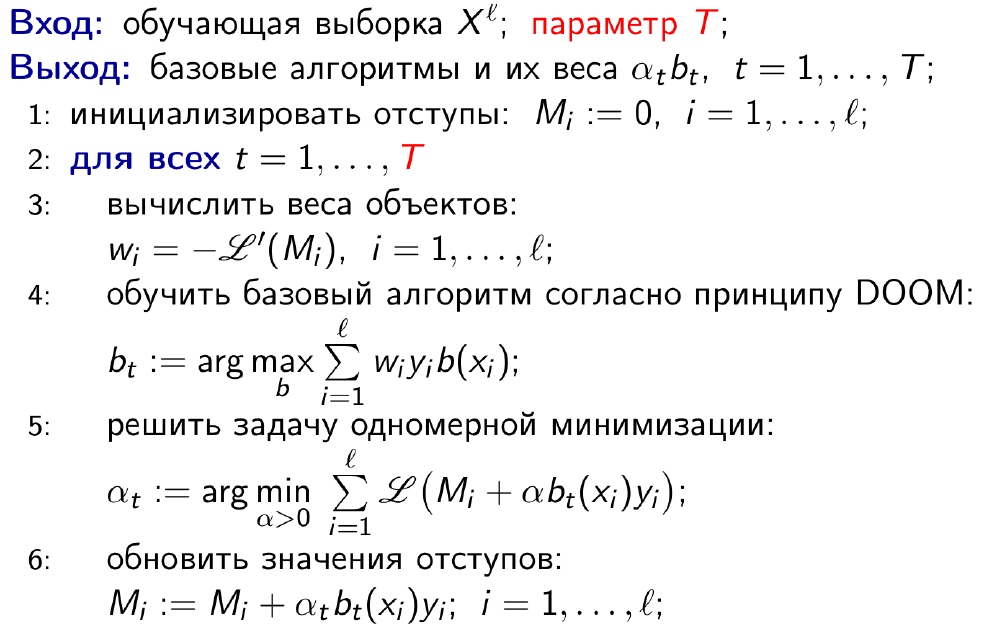

In [19]:
# Boosting
Image('pics/Boosting.png', height=600, width=600)

### Градиентный бустинг

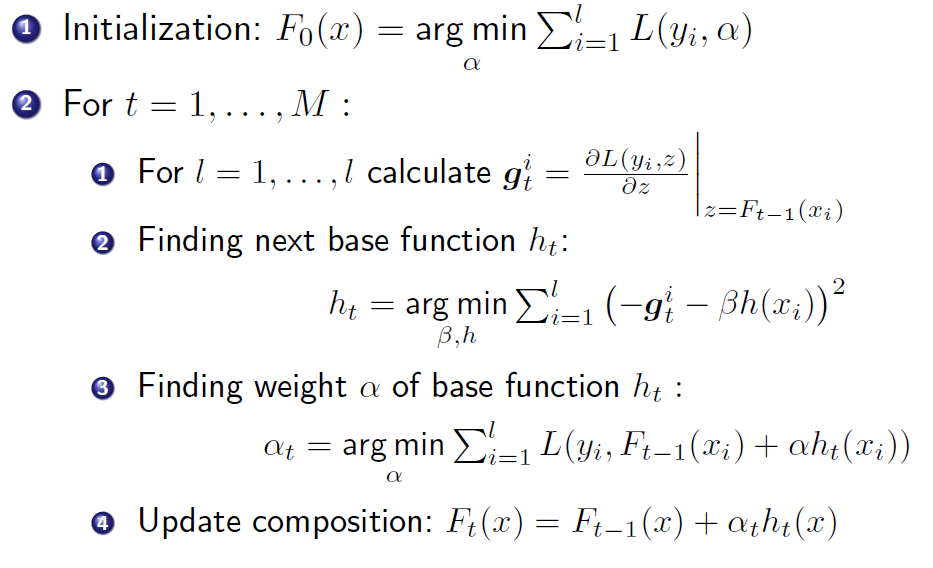

In [20]:
# Gradient Boosting
Image('pics/GBM.png', height=600, width=600)

### Пошаговый пример работы градиентного бустинга

##### Регрессия

C помощью GBM восстанавливаем зашумленную функцию $y=cos(x) + \varepsilon, \varepsilon \sim N(0,\dfrac{1}{5}), x \in [-5, 5]$

<img src='pics/gbm1.png'>

Запустим GBM и будем рисовать два типа графиков: актуальное приближение $\hat{f}(x)$ (синий график), а также каждое построенное дерево $\hat{f}_t(x)$ на своих псевдо-остатках (зеленый график). Номер графика соответствует номеру итерации:

<img src='pics/gbm2.png'>

<img src='pics/gbm3.png'>

Ко второй итерации наши деревья повторили основную форму функции. Однако, на первой итерации мы видим, что алгоритм построил только "левую ветвь" функции. Почему так происходит?

***Интерактивная демка, как GBM приближает функции: http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html***

##### Классификация

Решаем задачу бинарной классификации, $y \in \{ -1, +1\}$. Будем предсказывать и оптимизировать не сами метки классов, а их log-правдоподобие. Для этого переформулируем функции потерь над перемноженными предсказаниями и истинными метками $y \cdot f$7.

Варианты классификационных функций потерь:

***Logistic Loss:*** 
    $$L(y,f) = log(1 + exp(-2yf))$$
***Adaboost Loss:***
    $$L(y, f) = exp(-yf)$$

<img src='pics/gbm7.png'>

Решаем игрушечную задачу классификации, в качестве функции потерь выберем Logistic Loss:

<img src='pics/gbm4.png'>

<img src='pics/gbm5.png'>

<img src='pics/gbm6.png'>

На псевдо-остатках видно, что у нас есть достаточно много корректно классифицированных наблюдений, и какое-то количество наблюдений с большими ошибками, которые появились из-за шума в данных.

### Немного теоретических задач про GBDT

***Задача 1***

Что будет если обучать алгоритмы не на антиградиент, а на градиент в задаче регресии? Бинарной классификации? Насколько полезны будут получаться результаты?


***Задача 2***

Вы обучали градиентный бустинг, причём y-ки были в обучающей выборке были только положительные. Могут ли у вас получится отрицательные предсказания на тесте? А в бэггинге?


***Задача 3***

Можно ли обучать градиентный бустинг над линейными моделями? Насколько это оправданно?


### И немного практики: обзор популярных библиотек

### XGBoost

<img src='pics/xgboost.png' width=200>

1. Базовый алгоритм приближает направление, посчитанное с учетом вторых производных функции потерь.

2. Отклонение направления, построенного базовым алгоритмом, измеряется с помощью модифицированного функционала — из него удалено деление на вторую производную, за счет чего избегаются численные проблемы.

3. Функционал регуляризуется -- добавляются штрафы за количество листьев и за норму коэффициентов.

4. При построении дерева используется критерий информативности, зависящий от оптимального вектора сдвига.

5. Критерий останова при обучении дерева также зависит от оптимального сдвига.

##### Installation

http://xgboost.readthedocs.io/en/latest/build.html

###### Building on Ubuntu/Debian

In [ ]:
!git clone --recursive https://github.com/dmlc/xgboost
!cd xgboost
!make -j4

###### Building on MacOS

In [ ]:
!brew install gcc5
!pip install xgboost

###### Building on Windows

In [ ]:
git submodule init
git submodule update

In [ ]:
alias make='mingw32-make'

In [ ]:
cp make/mingw64.mk config.mk; make -j4

In [ ]:
mkdir build
cd build
cmake .. -G"Visual Studio 12 2013 Win64"

##### Test XGBoost

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/Users/yanina-n/miniconda3/envs/Clear_python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [5]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [6]:
bst = xgb.train(param, dtrain, num_round)

In [7]:
preds = bst.predict(dtest)

In [8]:
import numpy as np

best_preds = np.asarray([np.argmax(line) for line in preds])

In [10]:
from sklearn.metrics import precision_score

print(precision_score(y_test, best_preds, average='macro'))

1.0


### CatBoost

<img src='pics/catboost.png' width=500>

https://github.com/catboost/catboost

https://tech.yandex.com/catboost/doc/dg/concepts/about-docpage/

##### Installation

In [ ]:
!pip install catboost

##### Test CatBoost

In [11]:
import numpy 
from catboost import CatBoostRegressor

dataset = numpy.array([[1,4,5,6],[4,5,6,7],[30,40,50,60],[20,15,85,60]])
train_labels = [1.2,3.4,9.5,24.5]
model = CatBoostRegressor(learning_rate=1, depth=6, loss_function='RMSE')
fit_model = model.fit(dataset, train_labels)

print(fit_model.get_params())

0:	learn: 9.3965419	total: 60.4ms	remaining: 1m
1:	learn: 8.1455989	total: 61.8ms	remaining: 30.8s
2:	learn: 7.7998103	total: 62.8ms	remaining: 20.9s
3:	learn: 7.7099308	total: 63.4ms	remaining: 15.8s
4:	learn: 6.5485761	total: 63.9ms	remaining: 12.7s
5:	learn: 6.2642676	total: 64.7ms	remaining: 10.7s
6:	learn: 6.2623531	total: 65.3ms	remaining: 9.26s
7:	learn: 6.1218160	total: 66ms	remaining: 8.18s
8:	learn: 5.2251499	total: 66.8ms	remaining: 7.36s
9:	learn: 4.7289154	total: 67.2ms	remaining: 6.65s
10:	learn: 4.4571547	total: 67.7ms	remaining: 6.08s
11:	learn: 4.0155290	total: 68.1ms	remaining: 5.6s
12:	learn: 3.7689663	total: 68.4ms	remaining: 5.19s
13:	learn: 3.4113831	total: 68.7ms	remaining: 4.84s
14:	learn: 3.2103729	total: 69.1ms	remaining: 4.54s
15:	learn: 3.0981515	total: 69.6ms	remaining: 4.28s
16:	learn: 3.0356207	total: 69.9ms	remaining: 4.04s
17:	learn: 2.5957806	total: 70.3ms	remaining: 3.84s
18:	learn: 2.3431338	total: 70.8ms	remaining: 3.65s
19:	learn: 2.1910360	total: 

377:	learn: 0.0000000	total: 215ms	remaining: 354ms
378:	learn: 0.0000000	total: 215ms	remaining: 353ms
379:	learn: 0.0000000	total: 216ms	remaining: 352ms
380:	learn: 0.0000000	total: 216ms	remaining: 352ms
381:	learn: 0.0000000	total: 217ms	remaining: 351ms
382:	learn: 0.0000000	total: 217ms	remaining: 350ms
383:	learn: 0.0000000	total: 218ms	remaining: 350ms
384:	learn: 0.0000000	total: 218ms	remaining: 349ms
385:	learn: 0.0000000	total: 219ms	remaining: 348ms
386:	learn: 0.0000000	total: 220ms	remaining: 348ms
387:	learn: 0.0000000	total: 220ms	remaining: 347ms
388:	learn: 0.0000000	total: 221ms	remaining: 346ms
389:	learn: 0.0000000	total: 221ms	remaining: 346ms
390:	learn: 0.0000000	total: 222ms	remaining: 345ms
391:	learn: 0.0000000	total: 222ms	remaining: 344ms
392:	learn: 0.0000000	total: 223ms	remaining: 344ms
393:	learn: 0.0000000	total: 223ms	remaining: 343ms
394:	learn: 0.0000000	total: 223ms	remaining: 342ms
395:	learn: 0.0000000	total: 224ms	remaining: 342ms
396:	learn: 

742:	learn: 0.0000000	total: 371ms	remaining: 128ms
743:	learn: 0.0000000	total: 371ms	remaining: 128ms
744:	learn: 0.0000000	total: 372ms	remaining: 127ms
745:	learn: 0.0000000	total: 373ms	remaining: 127ms
746:	learn: 0.0000000	total: 373ms	remaining: 126ms
747:	learn: 0.0000000	total: 374ms	remaining: 126ms
748:	learn: 0.0000000	total: 375ms	remaining: 126ms
749:	learn: 0.0000000	total: 375ms	remaining: 125ms
750:	learn: 0.0000000	total: 376ms	remaining: 125ms
751:	learn: 0.0000000	total: 376ms	remaining: 124ms
752:	learn: 0.0000000	total: 376ms	remaining: 123ms
753:	learn: 0.0000000	total: 377ms	remaining: 123ms
754:	learn: 0.0000000	total: 377ms	remaining: 122ms
755:	learn: 0.0000000	total: 378ms	remaining: 122ms
756:	learn: 0.0000000	total: 379ms	remaining: 122ms
757:	learn: 0.0000000	total: 380ms	remaining: 121ms
758:	learn: 0.0000000	total: 381ms	remaining: 121ms
759:	learn: 0.0000000	total: 381ms	remaining: 120ms
760:	learn: 0.0000000	total: 382ms	remaining: 120ms
761:	learn: 

##### CatBoost Classifier

In [12]:
import numpy as np
from catboost import CatBoostClassifier

# initialize data
train_data = np.random.randint(0, 100, size=(100, 10))
train_label = np.random.randint(0, 2, size=(100))
test_data = np.random.randint(0, 100, size=(50, 10))

# specify the training parameters 
model = CatBoostClassifier(iterations=2, depth=2, learning_rate=1, loss_function='Logloss', logging_level='Verbose')

#train the model
model.fit(train_data, train_label, cat_features=[0,2,5])

# make the prediction using the resulting model
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
print("class = ", preds_class)
print("proba = ", preds_proba)

0:	learn: 0.6136110	total: 12.8ms	remaining: 12.8ms
1:	learn: 0.5832100	total: 28.9ms	remaining: 0us
class =  [0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 0.]
proba =  [[0.51253008 0.48746992]
 [0.74310619 0.25689381]
 [0.34409413 0.65590587]
 [0.13822676 0.86177324]
 [0.74310619 0.25689381]
 [0.13822676 0.86177324]
 [0.51253008 0.48746992]
 [0.07410146 0.92589854]
 [0.13822676 0.86177324]
 [0.82130584 0.17869416]
 [0.39821388 0.60178612]
 [0.82130584 0.17869416]
 [0.74310619 0.25689381]
 [0.13822676 0.86177324]
 [0.13822676 0.86177324]
 [0.74310619 0.25689381]
 [0.13822676 0.86177324]
 [0.74310619 0.25689381]
 [0.13822676 0.86177324]
 [0.74310619 0.25689381]
 [0.39821388 0.60178612]
 [0.13822676 0.86177324]
 [0.39821388 0.60178612]
 [0.74310619 0.25689381]
 [0.74310619 0.25689381]
 [0.39821388 0.60178612]
 [0.39821388 0.60178612]
 [0.74310619 0.25689381]
 [0.13822676 0.86177324]
 [

##### CatBoost Regressor

In [13]:
import numpy as np
from catboost import Pool, CatBoostRegressor

# initialize data
train_data = np.random.randint(0, 100, size=(100, 10))
train_label = np.random.randint(0, 1000, size=(100))
test_data = np.random.randint(0, 100, size=(50, 10))

# initialize Pool
train_pool = Pool(train_data, train_label, cat_features=[0,2,5])
test_pool = Pool(test_data, cat_features=[0,2,5]) 

# specify the training parameters 
model = CatBoostRegressor(iterations=2, depth=2, learning_rate=1, loss_function='RMSE')

#train the model
model.fit(train_pool)

# make the prediction using the resulting model
preds = model.predict(test_pool)
print(preds)

0:	learn: 307.0947178	total: 2.35ms	remaining: 2.35ms
1:	learn: 301.7627512	total: 4.18ms	remaining: 0us
[565.50941176 565.50941176 519.03188406 468.45490196 405.00784314
 519.03188406 468.45490196 519.03188406 468.45490196 468.45490196
 519.03188406 519.03188406 519.03188406 519.03188406 519.03188406
 462.16717818  51.14313725 405.00784314 462.16717818 519.03188406
 462.16717818 519.03188406 405.00784314 519.03188406 519.03188406
 468.45490196 519.03188406 405.00784314 468.45490196 519.03188406
 519.03188406 411.59019608 519.03188406 519.03188406 462.16717818
 462.16717818 519.03188406 519.03188406 411.59019608 519.03188406
 519.03188406 468.45490196 519.03188406 519.03188406 519.03188406
 519.03188406 468.45490196 519.03188406 519.03188406 468.45490196]


### Kaggle-Master Tips

##### Отбор признаков

##### Синтетический пример

In [14]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

x_data_generated, y_data_generated = make_classification()

pipe = make_pipeline(SelectFromModel(estimator=RandomForestClassifier()),
                     LogisticRegression())

lr = LogisticRegression()
rf = RandomForestClassifier()

print(cross_val_score(lr, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())
print(cross_val_score(rf, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())
print(cross_val_score(pipe, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())

-0.36955276194151615
-1.0483761508958678
-0.33214870729202944


##### Пример на реальных данных

Данные можно взять здесь: https://github.com/Yorko/mlcourse_open/blob/master/data/hostel_factors.csv

<img src='pics/features.png'>

Populating the interactive namespace from numpy and matplotlib
Feature ranking:
1. Персонал 0.182757 
2. Цена/качество 0.148373 
3. Состояние общего пространства 0.128296 
4. Дополнительные услуги 0.116604 
5. ССЦ 0.106668 
6. Общие условия и удобства 0.088589 
7. Состояние общей кухни 0.074273 
8. Заезд в хостел и выезд из хостела 0.061521 
9. Бронирование хостела  0.053615 
10. Состояние комнаты 0.039305 


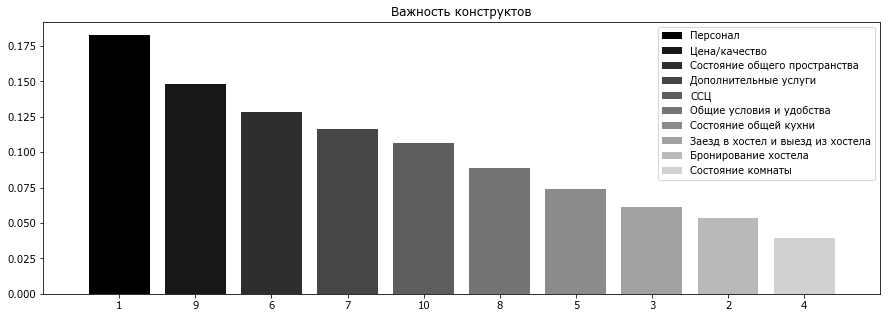

In [17]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
import seaborn as sns
# russian headres
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)
import pandas as pd
import numpy as np
from sklearn.ensemble.forest import RandomForestRegressor

hostel_data = pd.read_csv("../../../../data/hostel_factors.csv")
features = {"f1":u"Персонал",
"f2":u"Бронирование хостела ",
"f3":u"Заезд в хостел и выезд из хостела",
"f4":u"Состояние комнаты",
"f5":u"Состояние общей кухни",
"f6":u"Состояние общего пространства",
"f7":u"Дополнительные услуги",
"f8":u"Общие условия и удобства",
"f9":u"Цена/качество",
"f10":u"ССЦ"}

forest = RandomForestRegressor(n_estimators=1000, max_features=10,
                                random_state=0)

forest.fit(hostel_data.drop(['hostel', 'rating'], axis=1), 
           hostel_data['rating'])
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = 10
feature_indices = [ind+1 for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, 
            features["f"+str(feature_indices[f])], 
            importances[indices[f]]))
plt.figure(figsize=(15,5))
plt.title(u"Важность конструктов")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) 
               for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) 
                  for i in feature_indices])

### Stacking & Blending

Выборку разбивают на части (фолды), затем последовательно перебирая фолды обучают базовые алгоритмы на всех фолдах, кроме одного, а на оставшемся получают ответы базовых алгоритмов и трактуют их как значения соответствующих признаков на этом фолде. Для получения метапризнаков объектов тестовой выборки базовые алгоритмы обучают на всей обучающей выборке и берут их ответы на тестовой.

<img src='pics/stacking.png'>

Простейшая схема стекинга — блендинг

<img src='pics/blending.png'>

##### Пример - делаем стекинг своими руками

Берем данные соревнования Zillow Prize: Zillow’s Home Value Prediction

Данные тут: https://www.kaggle.com/c/zillow-prize-1/data

In [19]:
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

# Going to use these 4 base models for the stacking
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

In [21]:
properties = pd.read_csv("../../../../data/properties_2016.csv")
train_df = pd.read_csv("../../../../data/train_2016_v2.csv")
test_df = pd.read_csv("../../../../data/sample_submission_prop.csv")
test_df = test_df.rename(columns={'ParcelId': 'parcelid'})

In [32]:
train = train_df.merge(properties, how = 'left', on = 'parcelid')
test = test_df.merge(properties, on='parcelid', how='left')

##### Обработка категориальных признаков

In [33]:
from sklearn.preprocessing import LabelEncoder  

lbl = LabelEncoder()

for c in train.columns:
    train[c] = train[c].fillna(0)
    if train[c].dtype == 'object':
        lbl.fit(list(train[c].values))
        train[c] = lbl.transform(list(train[c].values))

for c in test.columns:
    test[c] = test[c].fillna(0)
    if test[c].dtype == 'object':
        lbl.fit(list(test[c].values))
        test[c] = lbl.transform(list(test[c].values))  

##### Простой отбор признаков

In [39]:
feature_names = list(train.columns)
print(np.setdiff1d(train.columns, test.columns))

['logerror' 'transactiondate']


In [40]:
do_not_include = ['parcelid', 'logerror', 'transactiondate', 'hashottuborspa',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'fireplaceflag',
 'taxdelinquencyflag']

feature_names = [f for f in train.columns if f not in do_not_include]

print("We have %i features."% len(feature_names))
train[feature_names].count()

We have 52 features.


airconditioningtypeid           90275
architecturalstyletypeid        90275
basementsqft                    90275
bathroomcnt                     90275
bedroomcnt                      90275
buildingclasstypeid             90275
buildingqualitytypeid           90275
calculatedbathnbr               90275
decktypeid                      90275
finishedfloor1squarefeet        90275
calculatedfinishedsquarefeet    90275
finishedsquarefeet12            90275
finishedsquarefeet13            90275
finishedsquarefeet15            90275
finishedsquarefeet50            90275
finishedsquarefeet6             90275
fips                            90275
fireplacecnt                    90275
fullbathcnt                     90275
garagecarcnt                    90275
garagetotalsqft                 90275
heatingorsystemtypeid           90275
latitude                        90275
longitude                       90275
lotsizesquarefeet               90275
poolcnt                         90275
poolsizesum 

In [41]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = train['logerror'].ravel()

train = train[feature_names]
test = test[feature_names]

In [42]:
print(train.shape)
print(test.shape)

(90275, 52)
(2985217, 52)


In [43]:
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data

##### Строим простые модели

In [ ]:
# Put in our parameters for said regressors
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 50,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':50,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 50,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 50,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

##### Обертка для удобной работы с базовыми моделями

In [ ]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn Regressor
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [ ]:
#Create 4 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestRegressor, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesRegressor, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostRegressor, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingRegressor, seed=SEED, params=gb_params)

##### Обучение базовых моделей

In [ ]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [44]:
####### THIS MAY TAKE A WHILE.... ###########

# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost

print("Training is complete")

Training is complete


In [45]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

[0.00319984 0.         0.00143518 0.02341613 0.02032381 0.00093328
 0.00396188 0.03647555 0.         0.01526103 0.07183779 0.04094188
 0.00015596 0.01618989 0.00591084 0.00194908 0.00155536 0.00106899
 0.02008001 0.00576184 0.00972941 0.00480407 0.03746111 0.056701
 0.02904583 0.00426209 0.00142522 0.         0.00294067 0.00243728
 0.01497146 0.03155763 0.02130465 0.00108373 0.01490836 0.04687811
 0.00759628 0.         0.00452264 0.         0.00659909 0.00104328
 0.00030116 0.03156589 0.00535317 0.10886165 0.06266684 0.
 0.04139313 0.12890577 0.00585641 0.04536569]
[2.50377665e-02 7.36643356e-04 2.23163338e-03 1.94861878e-02
 2.53286059e-02 6.32164485e-03 2.27493406e-02 1.58137423e-02
 3.26233741e-04 7.34724035e-03 4.04020311e-02 4.96640707e-02
 8.38028927e-05 5.71406801e-03 4.41048905e-03 3.35996078e-03
 5.88078506e-04 6.58092545e-03 1.69334585e-02 4.17010704e-03
 2.56822200e-03 1.76389853e-02 3.26703310e-02 3.06602010e-02
 2.62856314e-02 2.22259130e-02 4.82357202e-04 1.39568213e-03
 

In [46]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
     'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head()

,AdaBoost,ExtraTrees,GradientBoost,RandomForest
0,0.014160,0.006732,0.006991,0.008543
1,0.070647,0.012064,0.010041,0.012620
2,0.019864,0.001640,-0.010205,0.008295
3,0.035700,0.008279,0.008451,0.007379
4,-0.174271,0.006127,0.004216,0.010233


In [47]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Portland',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

##### Тренируем XGBoost на новых признаках

In [48]:
x_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test), axis=1)

In [49]:
X = x_train
y = y_train
y_mean = np.mean(y_train)

In [50]:
from sklearn.model_selection import train_test_split

Xtr, Xv, ytr, yv = train_test_split(X, y, test_size=0.2, random_state=2000)

dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Try different parameters! My favorite is random search :)
xgb_params = {
    'eta': 0.025,
    'max_depth': 7,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'lambda': 0.8,   
    'alpha': 0.4, 
    'base_score': y_mean,
    'silent': 1
}

In [51]:
model_xgb = xgb.train(xgb_params, dtrain, 2000, watchlist, early_stopping_rounds=300,
                  maximize=False, verbose_eval=15)

[0]	train-mae:0.068525	valid-mae:0.067815
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 300 rounds.
[15]	train-mae:0.067793	valid-mae:0.067382
[30]	train-mae:0.067523	valid-mae:0.067368
[45]	train-mae:0.067426	valid-mae:0.067499
[60]	train-mae:0.067388	valid-mae:0.067616
[75]	train-mae:0.067334	valid-mae:0.067762
[90]	train-mae:0.067269	valid-mae:0.06781
[105]	train-mae:0.067208	valid-mae:0.067863
[120]	train-mae:0.067147	valid-mae:0.067925
[135]	train-mae:0.067075	valid-mae:0.067957
[150]	train-mae:0.067023	valid-mae:0.067991
[165]	train-mae:0.066954	valid-mae:0.068027
[180]	train-mae:0.066874	valid-mae:0.068052
[195]	train-mae:0.0668	valid-mae:0.06808
[210]	train-mae:0.066699	valid-mae:0.068105
[225]	train-mae:0.066622	valid-mae:0.06813
[240]	train-mae:0.066559	valid-mae:0.068174
[255]	train-mae:0.066443	valid-mae:0.068219
[270]	train-mae:0.066341	valid-mae:0.068248
[285]	train-mae:0.066238	valid-ma

In [52]:
dtest = xgb.DMatrix(x_test)
predicted_test_xgb = model_xgb.predict(dtest)

##### Можно сделать посылку в соревнование:

In [55]:
sub = pd.read_csv('../../../../data/sample_submission_prop.csv')
for c in sub.columns[sub.columns != 'ParcelId']:
    sub[c] = predicted_test_xgb

print('Writing csv ...')
sub.to_csv('../../../../data/xgb_stacked.csv', index=False, float_format='%.4f')

Writing csv ...


### Практика - HousePricePrediction Contest

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("../../../../data/train.csv")
test = pd.read_csv("../../../../data/test.csv")

labels = train.SalePrice

train.drop(["Id", "SalePrice"], axis=1, inplace=True)
test.drop(["Id"], axis=1, inplace=True)

In [3]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


Краткое описание основных признаков:

- SalePrice — the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass — The building class
- MSZoning — The general zoning classification
- LotFrontage — Linear feet of street connected to property
- LotArea — Lot size in square feet
- Street — Type of road access
- Alley — Type of alley access
- LotShape — General shape of property
- LandContour — Flatness of the property
- Utilities — Type of utilities available
- LotConfig — Lot configuration

In [5]:
labels.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

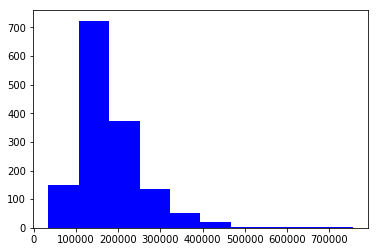

In [6]:
plt.hist(labels, color='blue')
plt.show()

Skew is: 0.12133506220520406


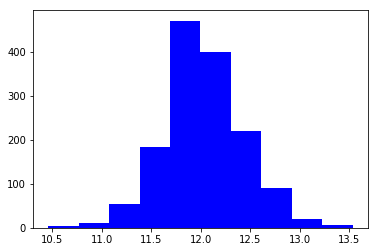

In [7]:
target = np.log(labels)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [9]:
all = pd.concat([train, test], axis=0)

In [10]:
to_drop = ["MiscFeature", "PoolQC"]
to_replace_to_none = ["Fence", "FireplaceQu", "Alley"]

for col in to_replace_to_none:
    all[col].fillna("No" + col, inplace=True)
    
all.drop(to_drop, axis=1, inplace=True, errors="ignore")
all.fillna(-1, inplace=True)

In [11]:
categorial = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "Fence", "SaleType", "SaleCondition"]
for col in categorial:
    all[col] = all[col].factorize()[0]
    
train = all.iloc[:train.shape[0]]
test = all.iloc[train.shape[0]:]

In [12]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, random_state=42)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=1000, max_depth=5, n_jobs=-1)
print(cross_val_score(regr, train, np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

/Users/yanina-n/miniconda3/envs/Clear_python3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/yanina-n/miniconda3/envs/Clear_python3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/yanina-n/miniconda3/envs/Clear_python3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


-0.027127960477707824


In [33]:
def submit(preds):
    submission = pd.read_csv("../../../../data/sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv("../../../../data/submission.csv", index=False)

regr = RandomForestRegressor(n_estimators=500, n_jobs=-1)
regr.fit(train, np.log1p(labels))
preds = regr.predict(test)
submit(np.expm1(preds))

In [34]:
!head ../../../../data/submission.csv

Id,SalePrice
1461,125515.96910055111
1462,154699.80388111714
1463,178396.78049304587
1464,181313.25028859603
1465,195726.27504195404
1466,182326.63780414345
1467,166453.32964329008
1468,173950.5399881651
1469,183073.03440644374


In [4]:
# Your code here

### Заключение

Ноутбук составлен по мотивам:
1. <a href="https://habrahabr.ru/company/ods/blog/327250/#postanovka-ml-zadachi"> Open Data Science, открытый курс машинного обучения. Тема 10 </a>
2. <a href="https://github.com/esokolov/ml-course-msu/tree/master/ML15-spring/lecture-notes"> Лекции Евгения Соколова </a>
3. <a href="https://alexanderdyakonov.wordpress.com/2017/03/10/cтекинг-stacking-и-блендинг-blending/"> Блог Александра Дьяконова </a>


### Обратная связь

<a href="https://docs.google.com/forms/d/e/1FAIpQLSfraHKZKZ4NJp1-KKCb5w0qQtXjtK76IkXWz9hwMM2AG9qH_A/viewform"> Оцените семинар </a>
